<h3> Learning from Network Project </h3>

<p> This project is a comparative study of three different social media networks:
    <ul>
        <li> <b> Fcebook </b> : This web graph is a page-page graph of verified
                Facebook sites. Nodes represent official Facebook pages while the edges are mutual
                likes between sites. Every node of the graph contains its ID and Facebook’s ID, the
                name of the page, and the page type. The data that generates the graph were
                collected through the Facebook Graph API in November 2017 and restricted to
                pages from 4 categories which are defined by Facebook. These categories are:
                politicians, governmental organizations, television shows and companies.
                The graph contains 22470 nodes and 171002 edges
        <li> <b> GitHub </b> : Nodes are developers who have started at least 10
                repositories and edges are mutual follower relationships between them. Each node of
                the graph contains its ID, the name of the user. The data were collected from the
                public API in June 2019.
                The graph contains 37700 nodes and 289003 edges.
        <li> <b> Twitch </b> : Nodes are Twich’s users and the edges are mutual
                friendships between them. For each node ID, there is a corresponding value of days,
                mature, views, partner, and new_id. The data were collected in May 2018. The graph
                is subdivided into six connected components representing the previous information
                but within different countries.
                This graph contains 34118 nodes and 429113 edges in total.
    </ul>

We will start by studying the global clustering coefficient for every graph, and then foucus on the study on random graphs.
    
</p>

<p> Let us first import the required libraries.
We will import at firts networkx, that contains all the algorithms on graphs. Also we will import pandas for reading the data and matplotlib for visualizing the data.
</p>

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math

<p> We need then to read all the graphs. </p>

In [17]:
def read_graph(path):
    df = pd.read_csv(path)
    G = nx.from_pandas_edgelist(df, source='id_1', target='id_2', create_using=nx.Graph())
    return G

graph_paths = {'facebook': 'facebook_large/complete/musae_facebook_edges.csv', 'git': 'git_web_ml/musae_git_edges.csv', 'twitch': 'twitch/ENGB/musae_ENGB_edges.csv'}

Facebook = read_graph(graph_paths['facebook'])
Git = read_graph(graph_paths['git'])
Twitch = read_graph(graph_paths['twitch'])

# for Faebook we can import also the node features
Facebook_nodes = pd.read_csv('facebook_large/complete/musae_facebook_target.csv')
Facebook_nodes = Facebook_nodes.set_index('id')
Facebook_nodes = Facebook_nodes.to_dict('index')
nx.set_node_attributes(Facebook, Facebook_nodes)

# print a random node to see the attributes
print(Facebook.nodes[0])

{'facebook_id': 145647315578475, 'page_name': 'The Voice of China 中国好声音', 'page_type': 'tvshow'}


<p> We now need to visualize the graphs. From the plots we can see that Facebook is a very dense graph, while the other graphs present nodes with smaller degree.</p>

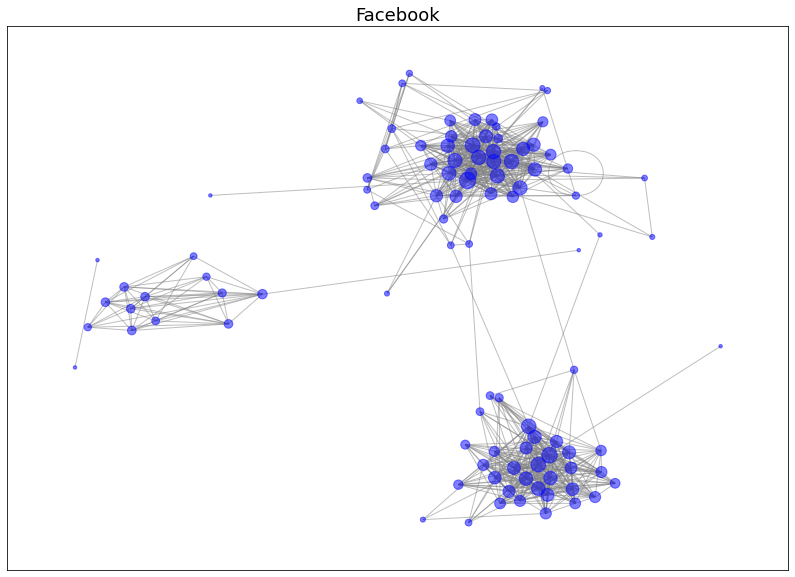

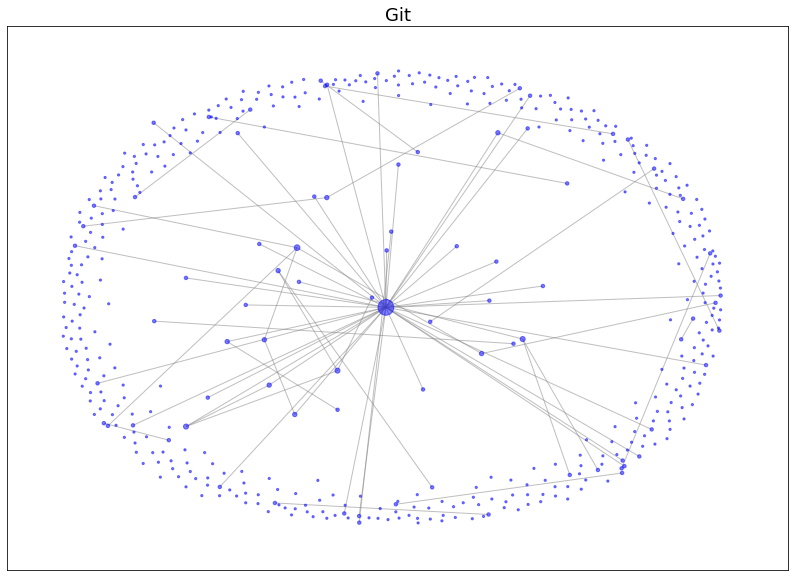

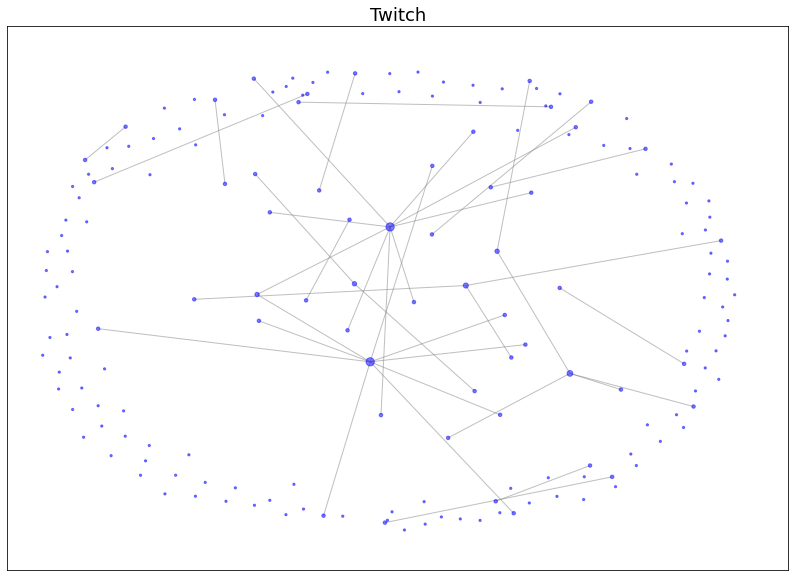

In [4]:
SIZE_MULTIPLICATOR = 7
MINIMUM_SIZE = 5

def plot_degree_graph(F, title, size):
    """
    Plot a subgraph of F in whitch the node size is proportional to the degree
    :param F: the graph
    :param title: the title of the plot
    :param size: the size of the subgraph
    """
    G = F.subgraph(list(Facebook.nodes())[:size])

    pos = nx.spring_layout(G, k=0.5) # get the position using the spring layout algorithm

    # set the plot parameters
    plt.rcParams['figure.figsize'] = [14, 10]

    sizes = [G.degree(node) * SIZE_MULTIPLICATOR + MINIMUM_SIZE for node in G]

    # draw the nodes and the edges (all)
    nx.draw_networkx(G, pos, width=1, node_color='blue', edge_color='grey', with_labels=False, alpha=0.5, node_size=sizes)

    plt.title(title, fontsize=18)
    plt.axis('on')
    plt.show()

plot_degree_graph(Facebook, 'Facebook', 100)
plot_degree_graph(Git, 'Git', 480)
plot_degree_graph(Twitch, 'Twitch', 480)

<p> Now we can Compute some simple graph statistics for each graph and then compared them. We can compute the degree centrality in order to find the edges with most degree for each graphs an compare them.</p>

In [21]:
Fcebook_degrees = nx.degree_centrality(Facebook)

top_10 = sorted(Fcebook_degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print('Top 10 nodes with highest degree centrality in Facebook:')
for node, degree in top_10:
    print(f'Node: {Facebook.nodes[node]}, degree: {degree}')


Facebook_closeness = nx.closeness_centrality(Facebook)

top_10 = sorted(Facebook_closeness.items(), key=lambda x: x[1], reverse=True)[:10]
print('Top 10 nodes with highest closeness centrality in Facebook:')
for node, closeness in top_10:
    print(f'Node: {Facebook.nodes[node]}, closeness: {closeness}')

Top 10 nodes with highest degree centrality in Facebook:
Node: {'facebook_id': 44053938557, 'page_name': 'U.S. Army', 'page_type': 'government'}, degree: 0.0315545863189283
Node: {'facebook_id': 1191441824276882, 'page_name': 'The White House', 'page_type': 'government'}, degree: 0.030174907650540747
Node: {'facebook_id': 63811549237, 'page_name': 'The Obama White House', 'page_type': 'government'}, degree: 0.029329298144109662
Node: {'facebook_id': 404391086302925, 'page_name': 'U.S. Army Chaplain Corps', 'page_type': 'government'}, degree: 0.028928746272642306
Node: {'facebook_id': 155837727772692, 'page_name': 'Honolulu District, U.S. Army Corps of Engineers', 'page_type': 'government'}, degree: 0.022430904802171883
Node: {'facebook_id': 15877306073, 'page_name': 'U.S. Department of State', 'page_type': 'government'}, degree: 0.02082869731630246
Node: {'facebook_id': 78922439964, 'page_name': 'FEMA Federal Emergency Management Agency', 'page_type': 'government'}, degree: 0.019938582

# Clustering Coefficient

In [ ]:
def clustering_coeff(G):
    n=G.number_of_nodes()
    binomial_coefficient = 6*(math.comb(n, 3))
    numt=0
    for node in G.nodes():
        N=list(G.neighbors(node))
        for v in N:
            for z in N:
                if v!=z and G.has_edge(v,z):
                    numt+=1
    CC=numt/binomial_coefficient
    return CC

print("Clustering Coeffcient of Facebook Graph: ", clustering_coeff(Facebook))
print("Transitivity Coeffcient of Facebook Graph: ", nx.transitivity(Facebook))

print("Clustering Coeffcient of Git Graph: ", clustering_coeff(Git))
print("Transitivity Coeffcient of Git Graph: ", nx.transitivity(Git))

print("Clustering Coeffcient of Twitch Graph: ", clustering_coeff(Twitch))
print("Transitivity Coeffcient of Twitch Graph: ", nx.transitivity(Twitch))